In [16]:
import numpy as np
import matplotlib.pyplot as plt
m = 100
X = 6*np.random.rand(m,1)-3
y = 0.5*X**2+X+2 + np.random.randn(m,1)

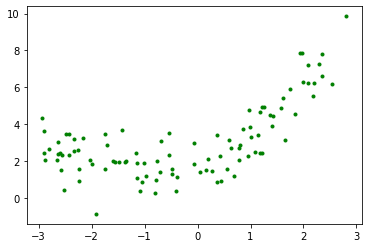

In [17]:
plt.plot(X,y,'g.')

Clearly a straight line will never fit this data properly. so let's use Scikit-learn's Polynomial Features class to transform our training data by adding the square(2nd degree polynomial) of each feature in the training set as a new feature

In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,include_bias = False)

In [19]:
X_poly = poly_features.fit_transform(X)

In [20]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [21]:
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([3.25903504]), array([[0.73155867]]))

In [22]:
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([1.91173749]), array([[1.02131221, 0.50549393]]))

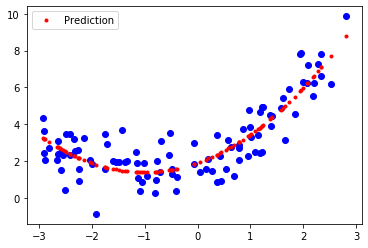

In [23]:
plt.scatter(X, y,c='b')
plt.plot(X, lin_reg.predict(poly_features.fit_transform(X)),'r.',label='Prediction')
plt.legend()

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Importing the dataset
datas = pd.read_csv("data.csv")
datas

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [32]:
# Divide dataset into two components  that is X and y.
# X will contain the Column between 1 and 2. y will contain the 2 column
X = datas.iloc[:,1:2].values
y = datas.iloc[:,2].values
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X,y)
X

array([[  0],
       [ 20],
       [ 40],
       [ 60],
       [ 80],
       [100]], dtype=int64)

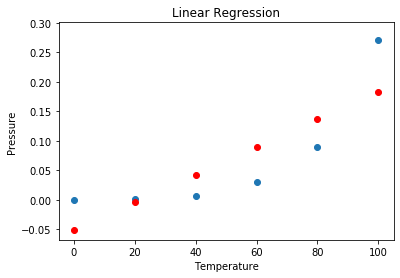

In [26]:
plt.scatter(X,y)
plt.plot(X,lin.predict(X),'ro',)
plt.title("Linear Regression")
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.show()

In [33]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly.fit(X_poly,y)
lin2 = LinearRegression()
lin2.fit(X_poly,y)
X_poly

array([[1.0e+00, 0.0e+00, 0.0e+00],
       [1.0e+00, 2.0e+01, 4.0e+02],
       [1.0e+00, 4.0e+01, 1.6e+03],
       [1.0e+00, 6.0e+01, 3.6e+03],
       [1.0e+00, 8.0e+01, 6.4e+03],
       [1.0e+00, 1.0e+02, 1.0e+04]])

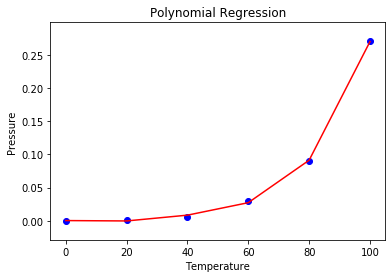

In [28]:
plt.scatter(X,y,color = 'b')
plt.plot(X,lin2.predict(X_poly),'r')
plt.title("Polynomial Regression")
plt.xlabel("Temperature")
plt.ylabel("Pressure")
plt.show()

In [29]:
datas

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [30]:
lin2.predict(poly.fit_transform([[90]]))

array([0.16053168])